<a href="https://colab.research.google.com/github/mahhembe/load-shortfall-regression-predict-api/blob/master/starter_notebook_group16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = 

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
df =pd.read_csv('utils/data/df_train.csv',index_col=0)

In [3]:
df

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,0.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,0.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,0.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,0.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,0.000000,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,2017-12-31 09:00:00,1.000000,level_6,0.0,2.666667,89.000000,95.666667,56.666667,4.333333,80.000000,...,280.816667,281.276667,285.150000,287.573333,280.483333,290.150000,284.816667,279.686667,278.483333,-28.333333
8759,2017-12-31 12:00:00,5.000000,level_6,0.0,2.000000,82.000000,85.000000,26.666667,8.000000,75.000000,...,283.483333,287.483333,286.483333,288.616667,287.150000,291.150000,287.150000,282.400000,280.150000,2266.666667
8760,2017-12-31 15:00:00,6.333333,level_9,0.4,7.333333,67.666667,71.000000,63.333333,8.333333,33.333333,...,285.150000,289.816667,283.816667,285.330000,289.150000,286.816667,289.150000,283.956667,281.150000,822.000000
8761,2017-12-31 18:00:00,7.333333,level_8,0.2,7.333333,67.666667,79.000000,63.333333,2.666667,51.666667,...,283.483333,287.523333,278.816667,281.410000,286.816667,284.150000,289.150000,282.666667,280.816667,-760.000000


In [ ]:
df =pd.read_csv('C:/Users/MAHHEMBE/Downloads/predict_/Advanced-Regression-Starter-Data-3036(1)/Advanced-Regression-Starter-Data/df_train.csv',index_col=0)

In [ ]:
df_test =pd.read_csv('C:/Users/MAHHEMBE/Downloads/predict_/Advanced-Regression-Starter-Data-3036(1)/Advanced-Regression-Starter-Data/df_test.csv',index_col=0)

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [ ]:
# look at data statistics
df.describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,12.666667,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


ValueError: num must be 1 <= num <= 44, not 45

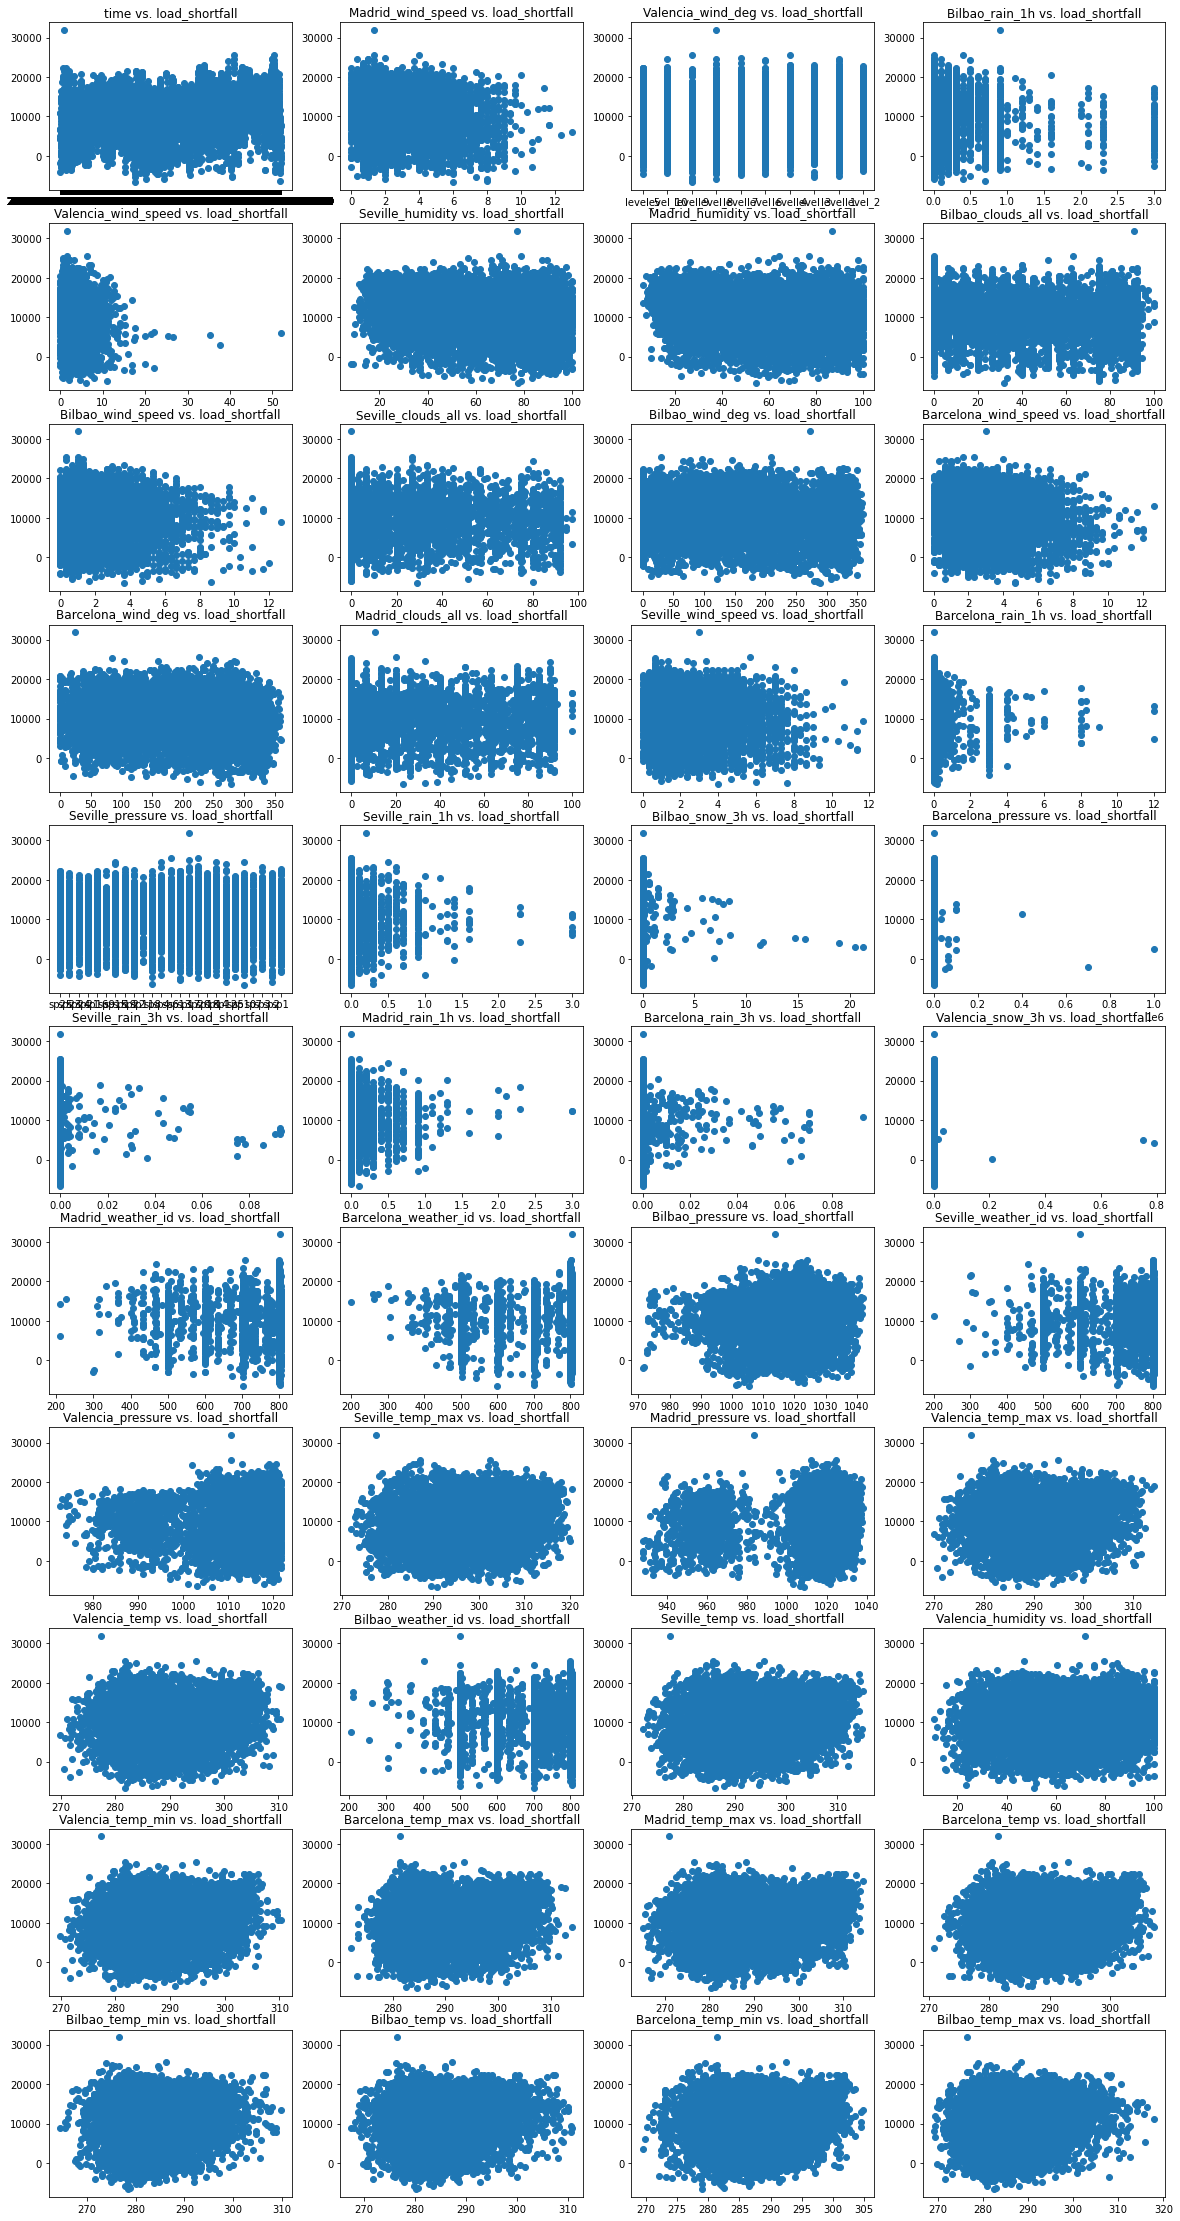

In [ ]:
#plot relavent features
c=df.columns
c=c.drop('load_shortfall_3h')
plt.figure(figsize=(20,40))
for index,col in enumerate(c):
    plt.subplot(11,4,index+1)
    plt.title("{} vs. load_shortfall".format(col))
    plt.scatter(df[col],df['load_shortfall_3h'])

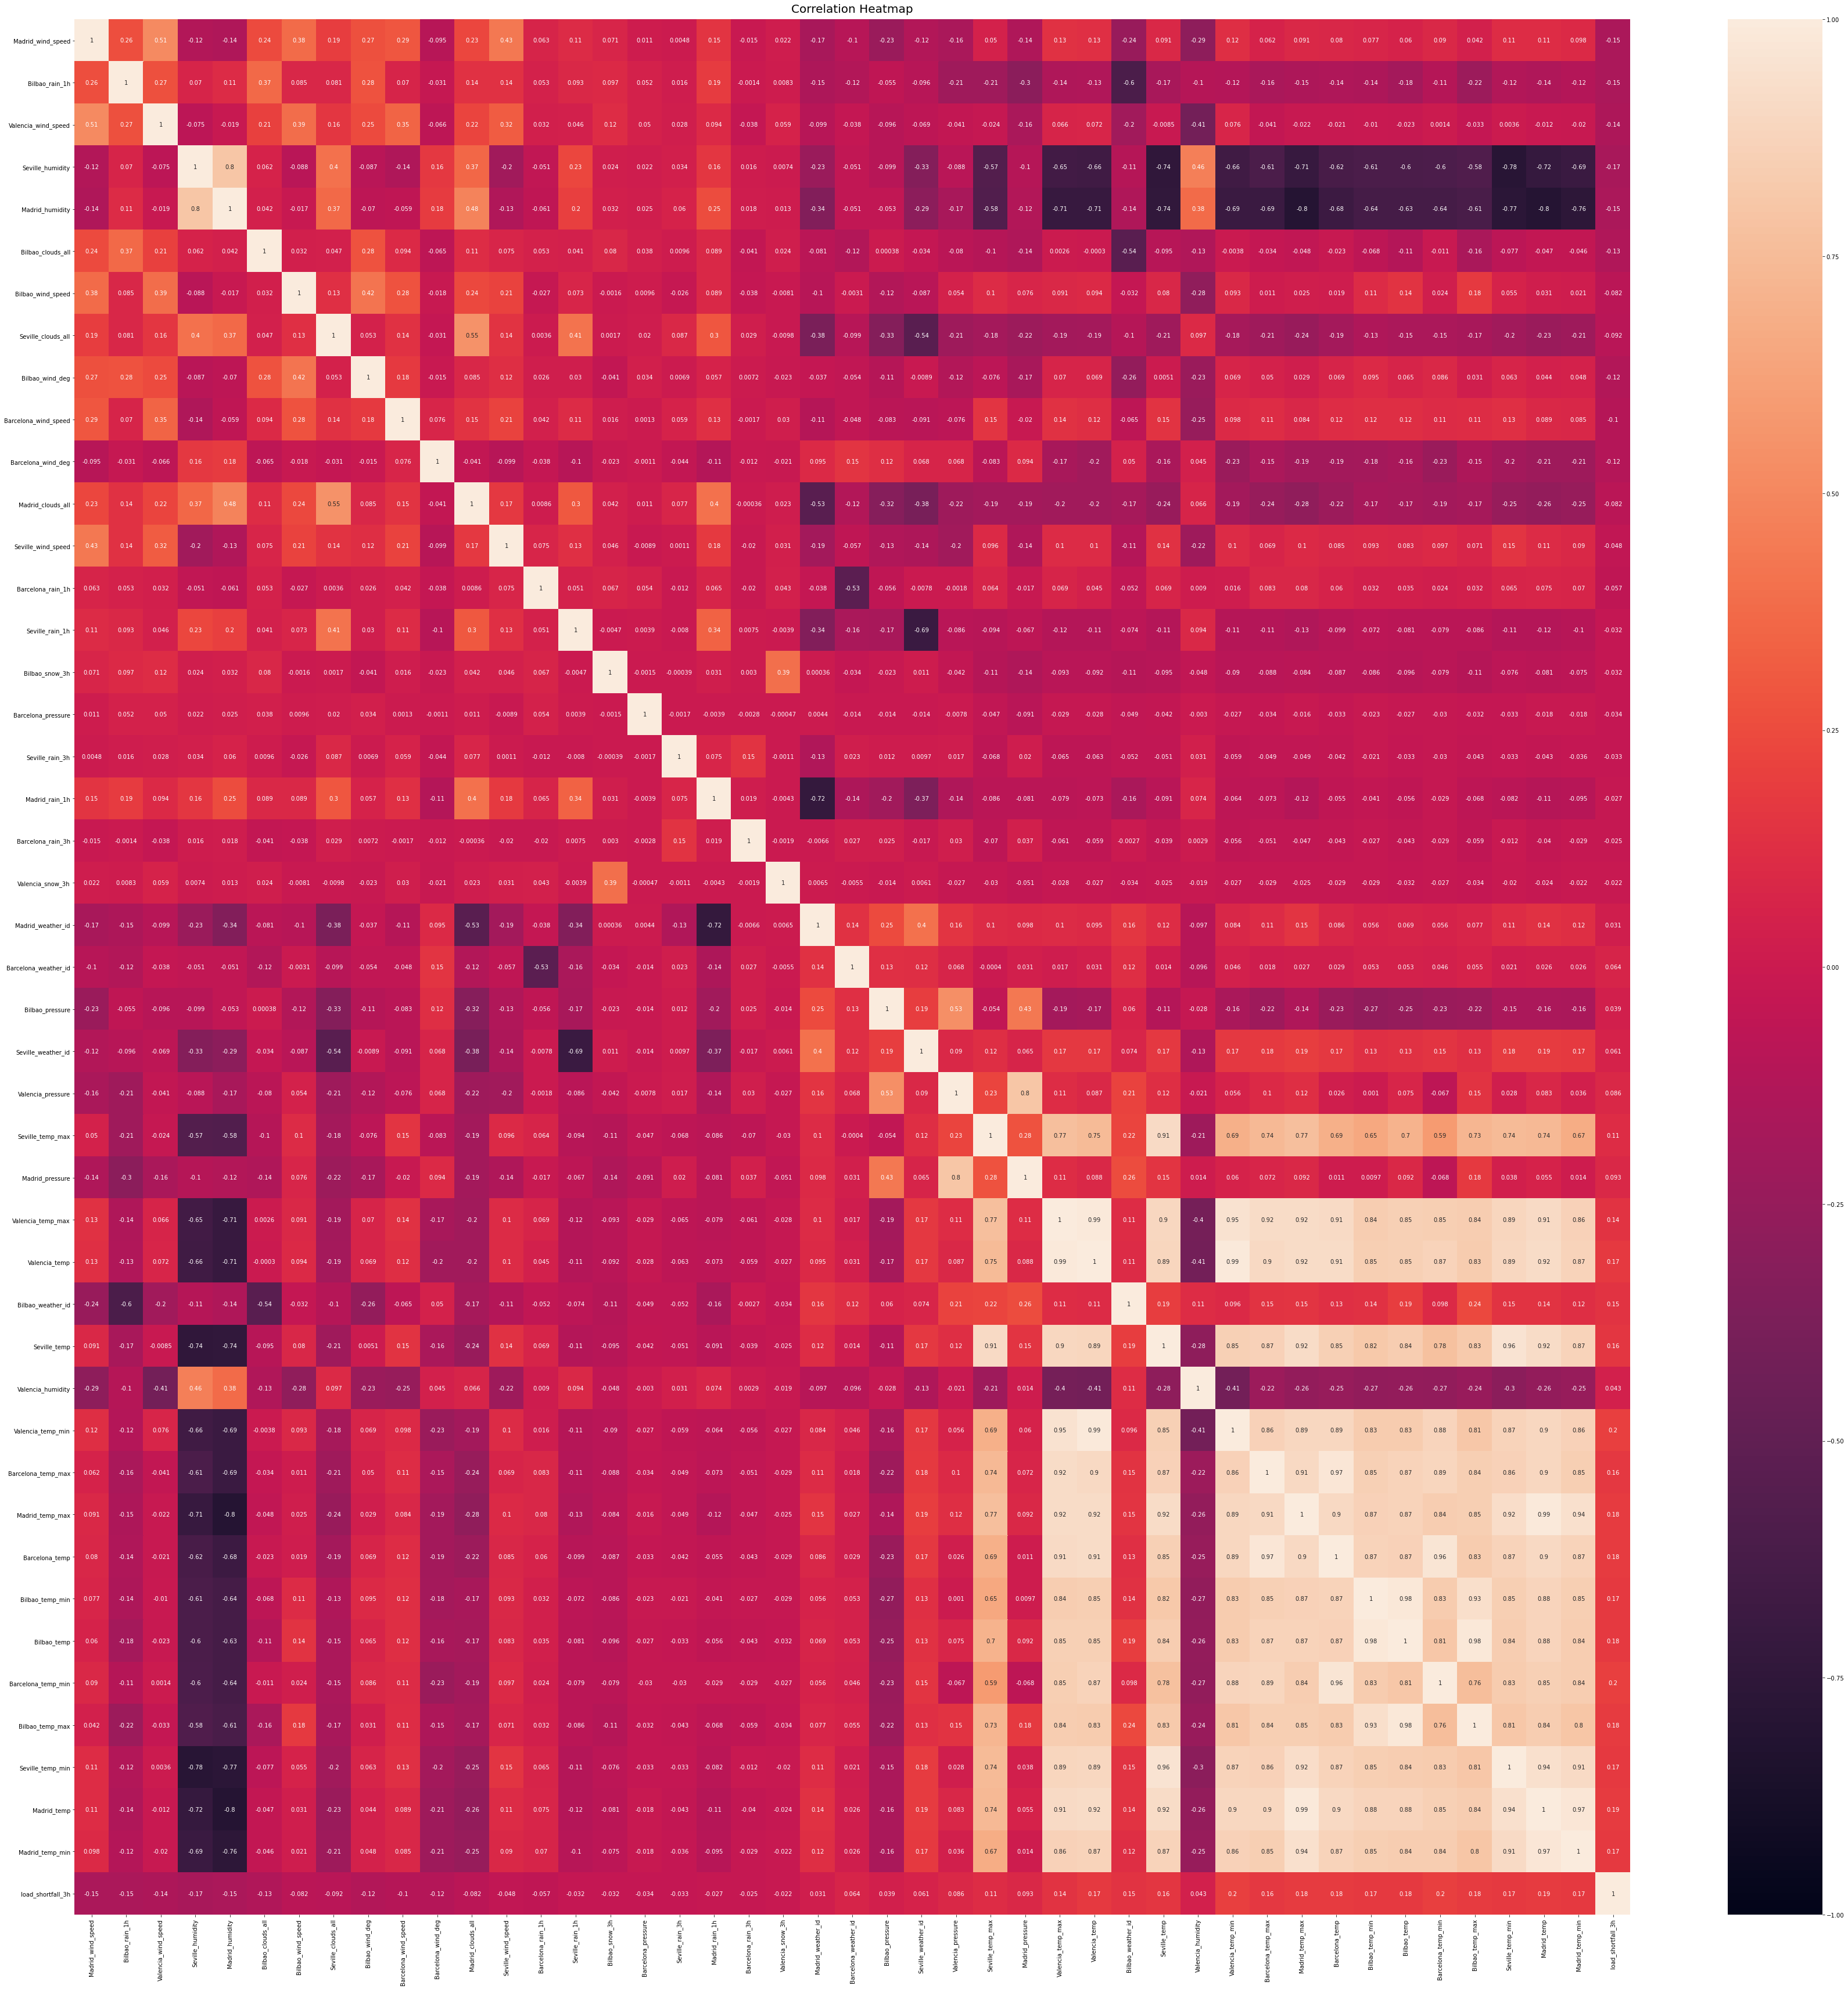

In [ ]:
# evaluate correlation
plt.figure(figsize=(60,60))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1,annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);

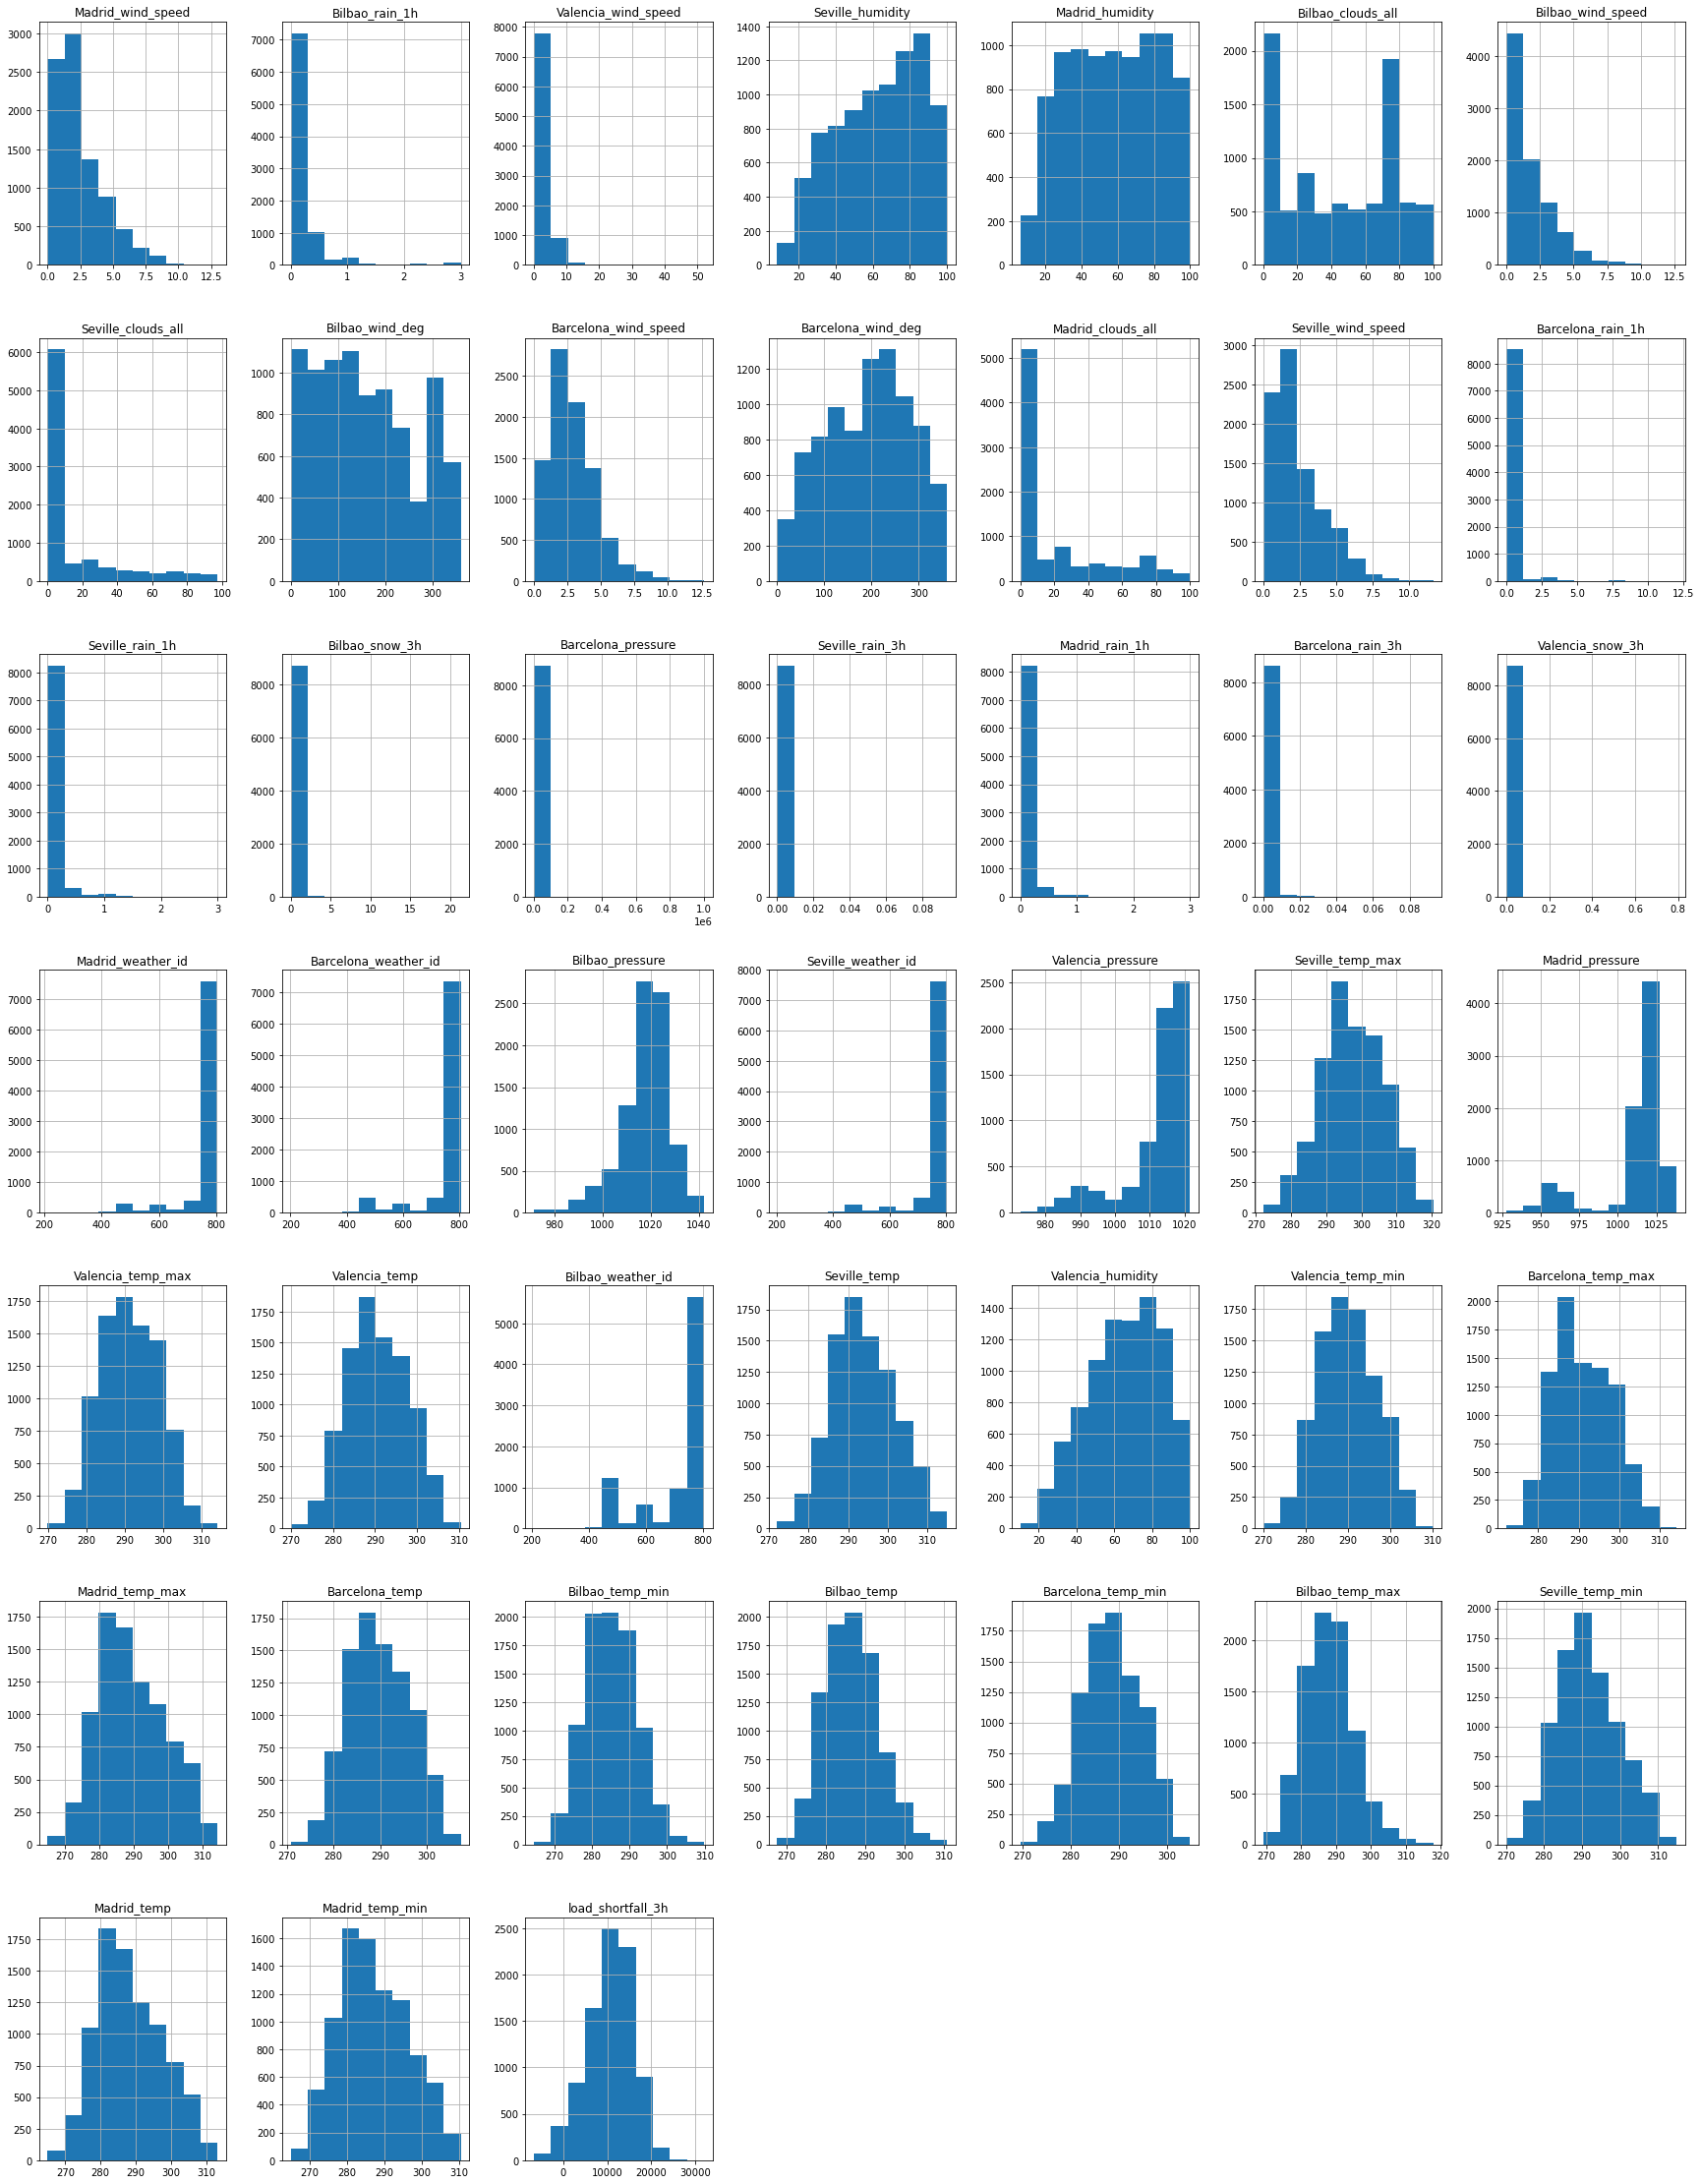

In [ ]:
# have a look at feature distributions
features = df.columns # create a list of all numerical features
df[features].hist(figsize=(30,40));

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [ ]:
#finding columns with null
df.isnull().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

In [ ]:
#mean of the row with nulls
print(df.Valencia_pressure.mean())

1012.0514065222828


In [ ]:
# remove missing values/ features
dfc=df.copy()
dfc['Valencia_pressure'] = dfc['Valencia_pressure'].fillna(df.Valencia_pressure.mean())
df_test['Valencia_pressure'] = df_test['Valencia_pressure'].fillna(df.Valencia_pressure.mean())
print(dfc.isnull().sum())
print(df_test.isnull().sum())

time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_temp_max      0
Madrid_temp_

In [ ]:
# create new features
print(dfc.info())
print(dfc.Seville_pressure.unique(),dfc.Valencia_wind_deg.unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

In [ ]:
#convert time object column to datetime column
dfc['time']=pd.to_datetime(df['time'])
dfc['year']=pd.DatetimeIndex(dfc.time).year
dfc['month']=pd.DatetimeIndex(dfc.time).month
dfc['day']=pd.DatetimeIndex(dfc.time).day
dfc['hour']=pd.DatetimeIndex(dfc.time).hour

df_test['time']=pd.to_datetime(df_test['time'])
df_test['year']=pd.DatetimeIndex(df_test.time).year
df_test['month']=pd.DatetimeIndex(df_test.time).month
df_test['day']=pd.DatetimeIndex(df_test.time).day
df_test['hour']=pd.DatetimeIndex(df_test.time).hour


#dfc=dfc.drop(['time'],axis=1)
print(dfc.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  8763 non-null   datetime64[ns]
 1   Madrid_wind_speed     8763 non-null   float64       
 2   Valencia_wind_deg     8763 non-null   object        
 3   Bilbao_rain_1h        8763 non-null   float64       
 4   Valencia_wind_speed   8763 non-null   float64       
 5   Seville_humidity      8763 non-null   float64       
 6   Madrid_humidity       8763 non-null   float64       
 7   Bilbao_clouds_all     8763 non-null   float64       
 8   Bilbao_wind_speed     8763 non-null   float64       
 9   Seville_clouds_all    8763 non-null   float64       
 10  Bilbao_wind_deg       8763 non-null   float64       
 11  Barcelona_wind_speed  8763 non-null   float64       
 12  Barcelona_wind_deg    8763 non-null   float64       
 13  Madrid_clouds_all 

In [ ]:
df_test['Seville_pressure_category']=df_test.Seville_pressure.map({'sp25':25, 'sp23':23, 'sp24':24, 'sp21':21, 'sp16':16, 'sp9':9, 'sp15':15, 'sp19':19, 'sp22':22, 'sp11':11,
 'sp8':8, 'sp4':4, 'sp6':6, 'sp13':13, 'sp17':17, 'sp20':20, 'sp18':18, 'sp14':14, 'sp12':12, 'sp5':5, 'sp10':10,
 'sp7':7, 'sp3':3, 'sp2':2, 'sp1':1})

df_test['Valencia_wind_deg_level']=df_test.Valencia_wind_deg.map({'level_5':5, 'level_10':10, 'level_9':9, 'level_8':8, 'level_7':7, 'level_6':6, 'level_4':4,
 'level_3':3, 'level_1':1, 'level_2':2})
df_test=df_test.drop(['Valencia_wind_deg','Seville_pressure'],axis=1)




df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2920 entries, 8763 to 11682
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   time                       2920 non-null   datetime64[ns]
 1   Madrid_wind_speed          2920 non-null   float64       
 2   Bilbao_rain_1h             2920 non-null   float64       
 3   Valencia_wind_speed        2920 non-null   float64       
 4   Seville_humidity           2920 non-null   float64       
 5   Madrid_humidity            2920 non-null   float64       
 6   Bilbao_clouds_all          2920 non-null   float64       
 7   Bilbao_wind_speed          2920 non-null   float64       
 8   Seville_clouds_all         2920 non-null   float64       
 9   Bilbao_wind_deg            2920 non-null   float64       
 10  Barcelona_wind_speed       2920 non-null   float64       
 11  Barcelona_wind_deg         2920 non-null   float64       
 12  Ma

In [ ]:
# create new features
dfc['Seville_pressure_category']=dfc.Seville_pressure.map({'sp25':25, 'sp23':23, 'sp24':24, 'sp21':21, 'sp16':16, 'sp9':9, 'sp15':15, 'sp19':19, 'sp22':22, 'sp11':11,
 'sp8':8, 'sp4':4, 'sp6':6, 'sp13':13, 'sp17':17, 'sp20':20, 'sp18':18, 'sp14':14, 'sp12':12, 'sp5':5, 'sp10':10,
 'sp7':7, 'sp3':3, 'sp2':2, 'sp1':1})

dfc['Valencia_wind_deg_level']=dfc.Valencia_wind_deg.map({'level_5':5, 'level_10':10, 'level_9':9, 'level_8':8, 'level_7':7, 'level_6':6, 'level_4':4,
 'level_3':3, 'level_1':1, 'level_2':2})
dfc=dfc.drop(['Valencia_wind_deg','Seville_pressure'],axis=1)




In [ ]:
#dfc=dfc.drop(['time'],axis=1)
#df_test=df_test.drop(['time'],axis=1)

#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#dfc = dfc.apply(lambda x: le.fit_transform(x))
#df_test = df_test.apply(lambda x: le.fit_transform(x))

print(dfc.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 52 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   time                       8763 non-null   datetime64[ns]
 1   Madrid_wind_speed          8763 non-null   float64       
 2   Bilbao_rain_1h             8763 non-null   float64       
 3   Valencia_wind_speed        8763 non-null   float64       
 4   Seville_humidity           8763 non-null   float64       
 5   Madrid_humidity            8763 non-null   float64       
 6   Bilbao_clouds_all          8763 non-null   float64       
 7   Bilbao_wind_speed          8763 non-null   float64       
 8   Seville_clouds_all         8763 non-null   float64       
 9   Bilbao_wind_deg            8763 non-null   float64       
 10  Barcelona_wind_speed       8763 non-null   float64       
 11  Barcelona_wind_deg         8763 non-null   float64       
 12  Madrid

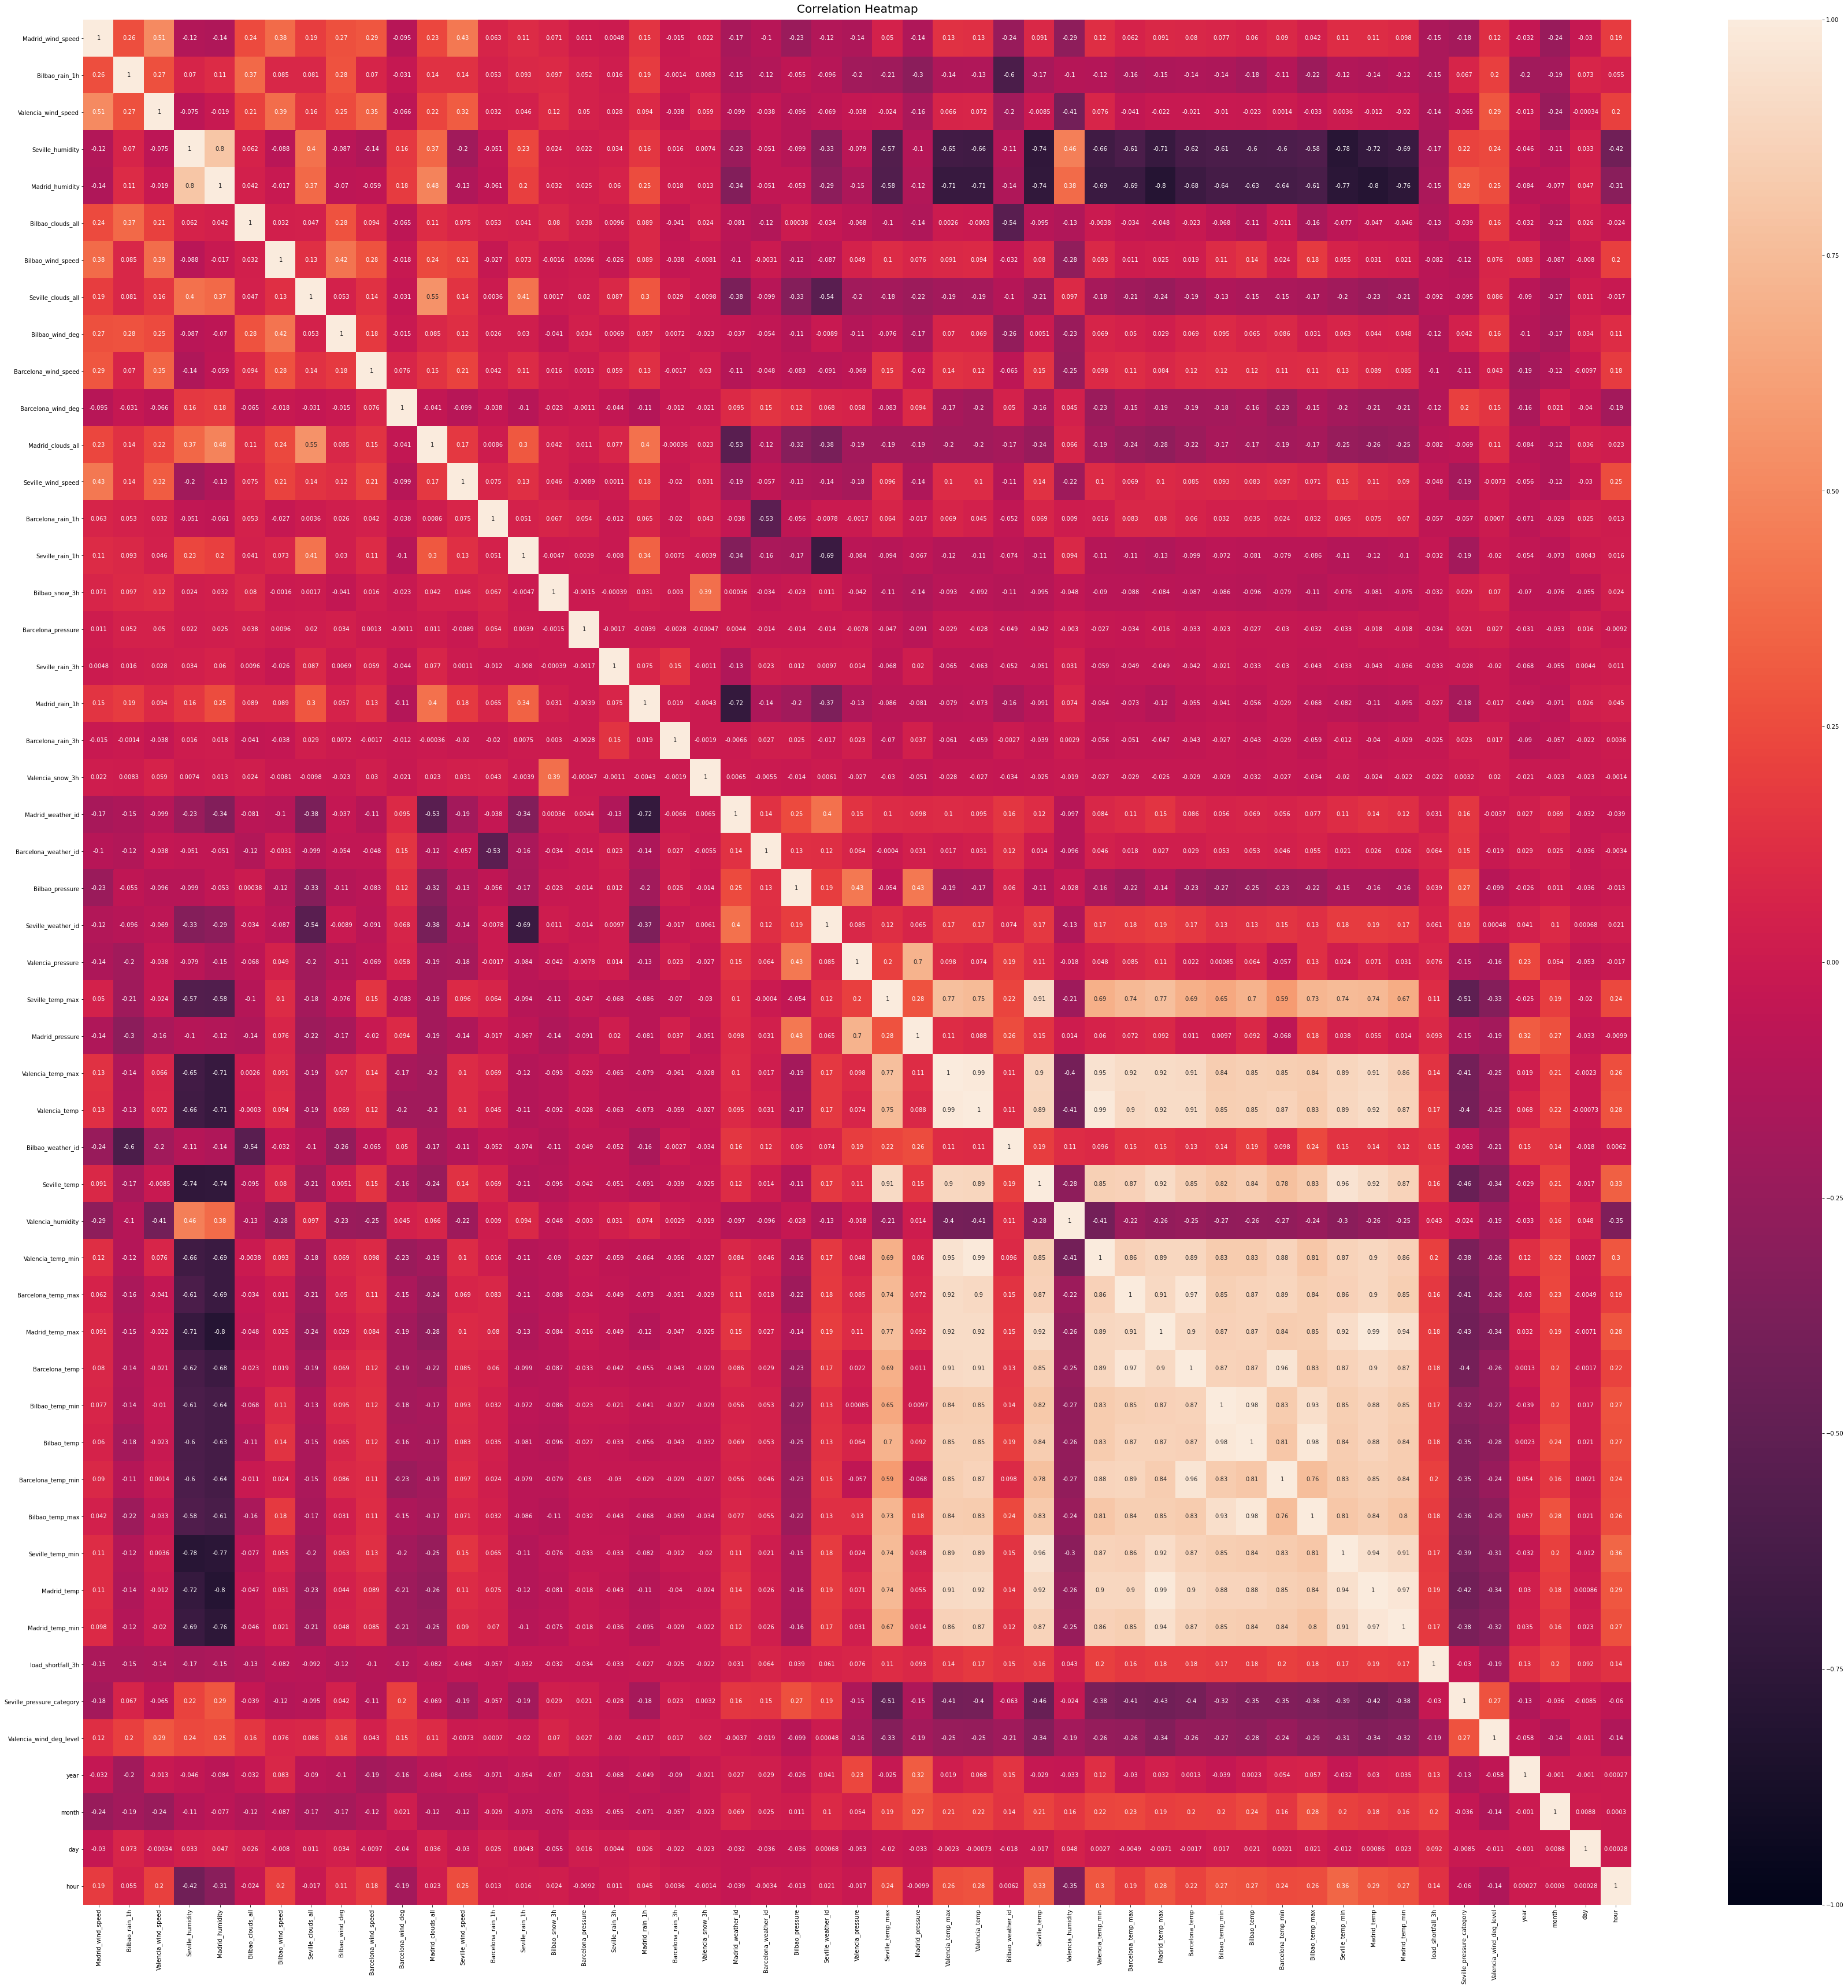

In [ ]:
# engineer existing features
plt.figure(figsize=(60,60))
heatmap = sns.heatmap(dfc.corr(), vmin=-1, vmax=1,annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data
X = dfc.drop(['load_shortfall_3h','time'], axis=1)
y = dfc['load_shortfall_3h']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=1)

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
# evaluate one or more ML models
y_pred=lm.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

4689.410634608692

In [ ]:
y_pred=lm.predict(df_test.drop('time', axis=1))

In [ ]:
daf=pd.DataFrame(y_pred, columns=['load_shortfall_3h'])

In [ ]:
daf

,load_shortfall_3h
0,7275.586830
1,6847.673966
2,8197.955372
3,8246.879882
4,7958.261333
...,...
2915,10478.073969
2916,12836.295149
2917,14606.276191
2918,14347.176982


In [ ]:
df_test['load_shortfall_3h']=daf.values

In [ ]:
df_test

,time,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Seville_temp_min,Madrid_temp,Madrid_temp_min,year,month,day,hour,Seville_pressure_category,Valencia_wind_deg_level,load_shortfall_3h
8763,2018-01-01 00:00:00,5.000000,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,...,283.150000,279.866667,279.150000,2018,1,1,0,25,8,7275.586830
8764,2018-01-01 03:00:00,4.666667,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,...,281.150000,279.193333,278.150000,2018,1,1,3,25,8,6847.673966
8765,2018-01-01 06:00:00,2.333333,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,...,280.483333,276.340000,276.150000,2018,1,1,6,25,7,8197.955372
8766,2018-01-01 09:00:00,2.666667,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,...,279.150000,275.953333,274.483333,2018,1,1,9,25,7,8246.879882
8767,2018-01-01 12:00:00,4.000000,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,...,284.483333,280.686667,280.150000,2018,1,1,12,25,7,7958.261333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11678,2018-12-31 09:00:00,0.333333,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,0.000000,70.000000,...,279.816667,274.910000,271.150000,2018,12,31,9,24,9,10478.073969
11679,2018-12-31 12:00:00,0.333333,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,0.000000,36.666667,...,287.150000,283.156667,280.483333,2018,12,31,12,24,8,12836.295149
11680,2018-12-31 15:00:00,1.000000,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,0.000000,14.666667,...,290.816667,287.733333,286.483333,2018,12,31,15,23,6,14606.276191
11681,2018-12-31 18:00:00,1.000000,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,0.000000,19.000000,...,287.483333,283.813333,282.150000,2018,12,31,18,23,6,14347.176982


In [ ]:
sub=df_test[['time','load_shortfall_3h']]
sub.to_csv("submission.csv", index=False)

In [ ]:
sub

,time,load_shortfall_3h
8763,2018-01-01 00:00:00,7275.586830
8764,2018-01-01 03:00:00,6847.673966
8765,2018-01-01 06:00:00,8197.955372
8766,2018-01-01 09:00:00,8246.879882
8767,2018-01-01 12:00:00,7958.261333
...,...,...
11678,2018-12-31 09:00:00,10478.073969
11679,2018-12-31 12:00:00,12836.295149
11680,2018-12-31 15:00:00,14606.276191
11681,2018-12-31 18:00:00,14347.176982


In [ ]:
df_test =pd.read_csv('C:/Users/MAHHEMBE/Downloads/predict_/Advanced-Regression-Starter-Data-3036(1)/Advanced-Regression-Starter-Data/df_test.csv',index_col=0)
d=pd.DataFrame(df_test.time)
d['time']=pd.to_datetime(d['time'])
d.to_csv("submissiona.csv", index=True)
d.info()
print(d)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2920 entries, 8763 to 11682
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    2920 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 45.6 KB
                     time
8763  2018-01-01 00:00:00
8764  2018-01-01 03:00:00
8765  2018-01-01 06:00:00
8766  2018-01-01 09:00:00
8767  2018-01-01 12:00:00
...                   ...
11678 2018-12-31 09:00:00
11679 2018-12-31 12:00:00
11680 2018-12-31 15:00:00
11681 2018-12-31 18:00:00
11682 2018-12-31 21:00:00

[2920 rows x 1 columns]


In [ ]:
#submission on keggle
output = pd.DataFrame({"time":df_test['time']})
submission = output.join(daf)        
submission.to_csv("submissionf.csv", index=False)
submission

,time,load_shortfall_3h
8763,2018-01-01 00:00:00,NaN
8764,2018-01-01 03:00:00,NaN
8765,2018-01-01 06:00:00,NaN
8766,2018-01-01 09:00:00,NaN
8767,2018-01-01 12:00:00,NaN
...,...,...
11678,2018-12-31 09:00:00,NaN
11679,2018-12-31 12:00:00,NaN
11680,2018-12-31 15:00:00,NaN
11681,2018-12-31 18:00:00,NaN


In [ ]:
lr = LinearRegression()

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2)

In [ ]:
#lr.fit(x_train, y_train)
df_test
#preds = lr.predict(x_test)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11678,2018-12-31 09:00:00,0.333333,level_9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,0.000000,...,279.816667,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000
11679,2018-12-31 12:00:00,0.333333,level_8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,0.000000,...,286.483333,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333
11680,2018-12-31 15:00:00,1.000000,level_6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,0.000000,...,289.483333,288.816667,288.820000,284.150000,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333
11681,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,0.000000,...,285.816667,285.150000,284.473333,280.150000,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic